# Lending Club Case study 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

loan = pd.read_csv(r'D:\upgrad\loan.csv')
loan.head()

c:\users\ankit\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


A preliminary observation of the data tells us that we might have 'NaN', 'None' values in our dataset.
So we know identify the number of columns which have all values as 'Nan'/ nan/None, so that these redundant columns can be removed from our dataset.

In [3]:
print('Number of columns having all entries as Nan : ',loan.isna().all(0).sum())           # columns have all NAs,therefore its good to remove these columns
print('\nName of columns having all nan entries :\n')
print(loan.columns[loan.isna().all(0)])   # columns name that have only NAs

Number of columns having all entries as Nan :  54

Name of columns having all nan entries :

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_

Frome above, we identify that a total of "54" columns have all values in their entries as nan

### Removing all null entries and insignificant columns from our dataframe

In [4]:
# Removing all columns having all entries as nan
loan.dropna(axis='columns',how='all', inplace=True)

#Identifying other in-significant columns

(loan.isna().sum(axis=0)*100)/len(loan)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [5]:
# Removing columns which have more that 80% of cells as nan
loan.drop(['next_pymnt_d','mths_since_last_record'],axis=1,inplace = True)

Now we identify the columns that are redundant based on the number of unique values there are in each column 

In [6]:
columns = ['term','grade','sub_grade','home_ownership','verification_status',
'loan_status','pymnt_plan','purpose','title','delinq_2yrs',
'inq_last_6mths','mths_since_last_delinq','open_acc',
'pub_rec','total_acc','initial_list_status','total_pymnt',
'total_rec_prncp',
'collections_12_mths_ex_med',
'policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths',
'pub_rec_bankruptcies','tax_liens']

for col in columns:
    print('---------',col,'----------')
    print(loan[col].unique())

--------- term ----------
[' 36 months' ' 60 months']
--------- grade ----------
['B' 'C' 'A' 'E' 'F' 'D' 'G']
--------- sub_grade ----------
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
--------- home_ownership ----------
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
--------- verification_status ----------
['Verified' 'Source Verified' 'Not Verified']
--------- loan_status ----------
['Fully Paid' 'Charged Off' 'Current']
--------- pymnt_plan ----------
['n']
--------- purpose ----------
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
--------- title ----------
['Computer' 'bike' 'real estate business' ... 'Retiring credit card debt'
 'MBA Loan Consolidation' 'JAL Loan']
--------- delinq_2yrs ----------
[ 0  2  3  1  4  

In [7]:
loan.drop(['pymnt_plan','initial_list_status', 
           'collections_12_mths_ex_med', 
           'policy_code', 'application_type', 
           'acc_now_delinq','tax_liens',
           'chargeoff_within_12_mths'], axis=1, inplace=True)

loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0,0.0


### Cleaning the columns for Analytics

In [8]:
loan['int_rate'] = loan['int_rate'].str.replace('%',"").astype(float)
loan['emp_length_numeric'] = pd.to_numeric(loan['emp_length'].str.replace('year',"").str.replace('s',"").str.replace('< 1','0').str.replace(' ','').str.replace('+',''))
loan['revol_util'] =  loan['revol_util'].str.replace('%',"").astype(float)

In [9]:
#extracting month and day from last_pymnt_d
loan['last_pymnt_d_month'] = loan['last_pymnt_d'].str.split("-").str[1]
loan['last_pymnt_d_day'] = loan['last_pymnt_d'].str.split("-").str[0]

#extracting month and day from last_credit_pull_d
loan['last_credit_pull_d_month'] = loan['last_credit_pull_d'].str.split("-").str[1]
loan['last_credit_pull_d_day'] = loan['last_credit_pull_d'].str.split("-").str[0]

#extracting month and day from last_credit_pull_d
loan['last_credit_pull_d_month'] = loan['last_credit_pull_d'].str.split("-").str[1]
loan['last_credit_pull_d_day'] = loan['last_credit_pull_d'].str.split("-").str[0]

#extracting month and day from issue_d_month
loan['issue_d_month'] = loan['issue_d'].str.split("-").str[1]
loan['issue_d_day'] = loan['issue_d'].str.split("-").str[0]

In [10]:
(loan['loan_status'].value_counts()/len(loan))*100

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [11]:
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,delinq_amnt,pub_rec_bankruptcies,emp_length_numeric,last_pymnt_d_month,last_pymnt_d_day,last_credit_pull_d_month,last_credit_pull_d_day,issue_d_month,issue_d_day
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,May-16,0,0.0,10.0,15,Jan,16,May,11,Dec
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,Sep-13,0,0.0,0.0,13,Apr,13,Sep,11,Dec
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,May-16,0,0.0,10.0,14,Jun,16,May,11,Dec
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,Apr-16,0,0.0,10.0,15,Jan,16,Apr,11,Dec
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,May-16,0,0.0,1.0,16,May,16,May,11,Dec


In [12]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_


In [16]:
loan.groupby('loan_status')['loan_amnt'].agg(['min','max','mean','median',percentile(50), percentile(95)])

,min,max,mean,median,percentile_50,percentile_95
loan_status,,,,,,
Charged Off,900,35000,12104.385108,10000,10000,27300
Current,1000,35000,17053.991228,15825,15825,35000
Fully Paid,500,35000,10866.455994,9600,9600,25000


From above we can see that the median of default customers is somewhat higher than that of Fully pain and Current.

Therefore we can conclude that DEFAULT Customers have applied for Ligh Loan Amount.

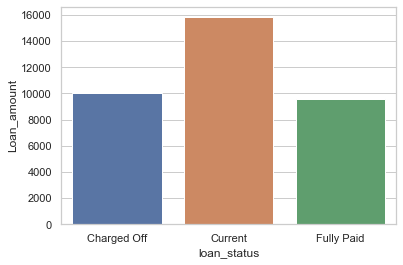

In [21]:
temp = loan.groupby('loan_status')['loan_amnt'].agg(['median'])
temp.reset_index(inplace=True)
temp.rename(columns = {'median':'Loan_amount'}, inplace = True)

sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.barplot(x="loan_status", y="Loan_amount", data=temp)

In [18]:
loan.groupby('loan_status')['funded_amnt'].agg(['min','max','mean','median',percentile(50), percentile(95)])
#Default customers have high funded amount

,min,max,mean,median,percentile_50,percentile_95
loan_status,,,,,,
Charged Off,900,35000,11753.398792,10000,10000,25000.0
Current,1000,35000,16485.701754,15225,15225,33620.0
Fully Paid,500,35000,10618.520486,9200,9200,25000.0


In [19]:

loan.groupby('loan_status')['loan_amnt','funded_amnt'].sum().eval('percentage_amnt_funded = funded_amnt / loan_amnt')
#There is no significant difference in % of amount funded  for all 3 categories of loan status


,loan_amnt,funded_amnt,percentage_amnt_funded
loan_status,,,
Charged Off,68111375,66136375,0.971003
Current,19441550,18793700,0.966677
Fully Paid,358049725,349880250,0.977183


Since higher interest brings higher income for fincaial institution.However, at the as time it can leads to customers switching to competitors
Also,the high intreset rates are levied to risky customer
So, lets see what are the factors that impact the ROI

In [15]:
#IMPACT OF DTI ON ROI 

print('Corelation value /Impact of DTI on Interest rate  :',loan['dti'].corr(loan['int_rate']))

#dti does not impact the int_rate much,However,the customer with lower dti is good for business

# IMPACT OF HOME OWNERSHIP ON ROI
print('\n Impact of type of home ownership on Interst rate :\n', loan.groupby(['home_ownership'])['int_rate'].agg(['median']))



Corelation value /Impact of DTI on Interest rate  : 0.11116168418161568

 Impact of type of home ownership on Interst rate :
                 median
home_ownership        
MORTGAGE         11.49
NONE              8.70
OTHER            11.86
OWN              11.58
RENT             12.21


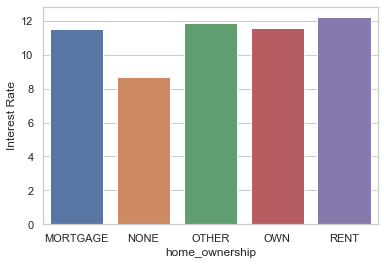

In [22]:
temp=loan.groupby(['home_ownership'])['int_rate'].agg(['median']).reset_index()
sns.set(style="whitegrid")
temp.rename(columns = {'median':'Interest Rate'}, inplace = True)
ax = sns.barplot(x="home_ownership", y="Interest Rate", data=temp)

Frome above we see that, Customer with  "RENT" accomodation attracts more intrest rate

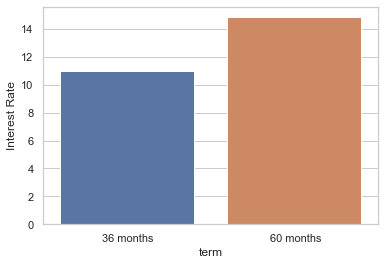

In [24]:
loan.groupby(['term'])['int_rate'].agg(['median'])
temp = loan.groupby(['term'])['int_rate'].agg(['median'])
temp.reset_index(inplace=True)
temp.rename(columns = {'median':'Interest Rate'}, inplace = True)

sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.barplot(x="term", y="Interest Rate", data=temp)


more tenure attracts more intrest rate 

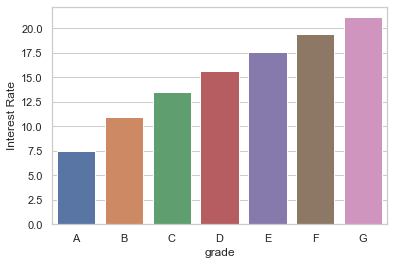

In [25]:
#IMPACT OF GRADE ON INT_RATE
loan.groupby(['grade'])['int_rate'].agg(['median'])
temp = loan.groupby(['grade'])['int_rate'].agg(['median'])
temp.reset_index(inplace=True)
temp.rename(columns = {'median':'Interest Rate'}, inplace = True)

sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.barplot(x="grade", y="Interest Rate", data=temp)

grade'A' loans has least intrest rate 

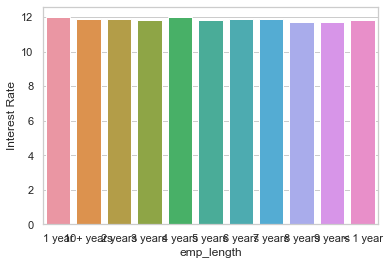

In [26]:
temp = loan.groupby(['emp_length'])['int_rate'].agg(['median'])
temp.reset_index(inplace=True)
temp.rename(columns = {'median':'Interest Rate'}, inplace = True)

sns.set(style="whitegrid")
ax = sns.barplot(x="emp_length", y="Interest Rate", data=temp)

From above visulaization we can conclude that, Emp_Length has no impact on the interst rate

In [28]:
loan.groupby(['purpose'])['int_rate'].agg(['median'])

,median
purpose,
car,10.37
credit_card,11.49
debt_consolidation,12.42
educational,11.83
home_improvement,11.12
house,11.83
major_purchase,10.74
medical,11.34
moving,11.14


Debt_consolidation has highest INTEREST RATE as its the riskest loan to lend

In [29]:
#IMPACT OF ANNUAL INCOME ON INT_RATE
loan['annual_inc'].corr(loan['int_rate'])


0.05318515766095631

annual_inc does not impact the int_rate

In [30]:
#IMPACT OF OPEN ACCOUNT ON INT_RATE
loan['open_acc'].corr(loan['int_rate'])


0.010394875975481659

open_acc does not impact the int_rate

In [35]:
loan['revol_bal'].corr(loan['int_rate'])

0.09709996251900718

revol_bal does not impact the int_rate

In [36]:
loan['mths_since_last_delinq'].corr(loan['int_rate'])

-0.05561262681280067

mths_since_last_delinq does not impact the int_rate

In [37]:
loan['revol_util'].corr(loan['int_rate'])

0.4671679509699442

Higher the revol_util,higher would be the intrest_rate

In [38]:
#IMPACT OF issue_d_month LENGTH ON INT_RATE
loan.groupby(['issue_d_month'])['int_rate'].agg(['median'])

,median
issue_d_month,
07,10.28
08,11.03
09,12.21
10,11.49
11,11.71


issue_d_month does not impact the int_rate

In [49]:
################################ LOAN STATUS & TERM ###########################

temp = pd.crosstab(loan['loan_status'],loan['term']).apply(lambda r: r/r.sum(), axis=1)*100
temp.reset_index(inplace=True)
print(temp)


term  loan_status   36 months   60 months
0     Charged Off   57.348498   42.651502
1         Current    0.000000  100.000000
2      Fully Paid   78.509863   21.490137


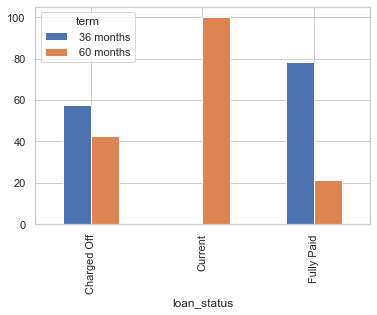

In [50]:
temp.plot(x="loan_status", y=[' 36 months', ' 60 months'], kind="bar")
#sns.set(style="whitegrid")
#ax = sns.catplot(x="loan_status", y=[' 36 months', ' 60 months'], data=temp)

Customers who have taken lower tenure(36 months) are likely to repay the loan

In [53]:

################################ LOAN STATUS & DTI ############################
temp=loan.groupby('loan_status')['dti'].agg(['mean','median'])
temp.rename(columns ={'median':'dti'}, inplace= True)
temp.reset_index(inplace=True)
print(temp)


   loan_status       mean    dti
0  Charged Off  14.000624  14.29
1      Current  14.750009  15.05
2   Fully Paid  13.148421  13.20


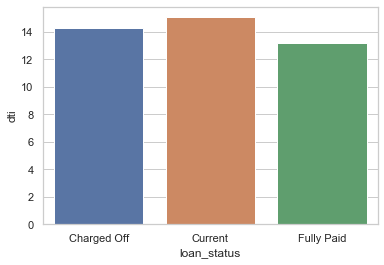

In [54]:
sns.set(style="whitegrid")
ax = sns.barplot(x="loan_status", y="dti", data=temp)

Fully-Paid customers have low dti as compared to deliquent customer.Therefore,customers with low dti are good for business

In [58]:
temp = pd.crosstab(loan['loan_status'],loan['home_ownership']).apply(lambda r: r/r.sum(), axis=1)*100
temp.reset_index(inplace=True)
print(temp)

print(temp.columns)

home_ownership  loan_status   MORTGAGE      NONE     OTHER       OWN  \
0               Charged Off  41.354185  0.000000  0.319886  7.872756   
1                   Current  55.964912  0.000000  0.000000  7.280702   
2                Fully Paid  44.594841  0.009105  0.242792  7.684370   

home_ownership       RENT  
0               50.453172  
1               36.754386  
2               47.468892  
Index(['loan_status', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'], dtype='object', name='home_ownership')


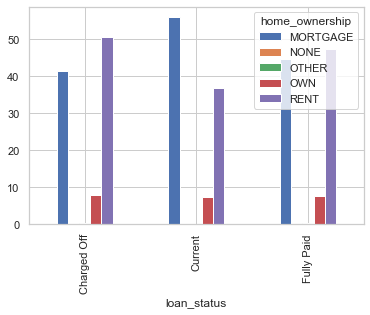

In [59]:
temp.plot(x="loan_status", y=['MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'], kind="bar")

Customers with Rented accomodation are likely to default more followed by customer who have mortagegd the property.

Customers with owned house are least likely to default

In [63]:
tab_loan_status_grade = pd.crosstab(loan['loan_status'],loan['grade']).apply(lambda r: r/r.sum(), axis=1)*100
tab_loan_status_grade.reset_index(inplace=True)
print(tab_loan_status_grade)


grade  loan_status          A          B          C          D          E  \
0      Charged Off  10.698418  25.324329  23.938155  19.868491  12.706593   
1          Current   3.508772  30.263158  23.157895  19.473684  15.701754   
2       Fully Paid  28.658574  31.107739  19.687405  12.039454   5.911988   

grade         F         G  
0      5.669095  1.794917  
1      6.403509  1.491228  
2      1.993930  0.600910  


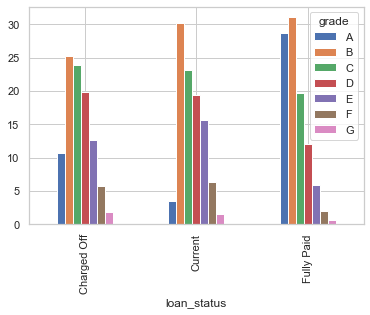

In [65]:
tab_loan_status_grade.plot(x="loan_status", y=['A','B','C','D','E','F','G'], kind="bar")

Grade B,C and D have high chances to default

In [66]:
#PURPOSE AND LOAN STATUS
loan['purpose'].value_counts()/len(loan)*100

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
house                  0.959287
vacation               0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

Major loans where used to consolidate the debt consolidation

In [68]:
tab_loan_status_purpose = pd.crosstab(loan['loan_status'],loan['purpose']).apply(lambda r: r/r.sum(), axis=1)*100
tab_loan_status_purpose.head(5)

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,2.843433,9.632131,49.173627,0.995202,6.166696,1.048516,3.945264,1.883775,1.634974,11.249334,0.337658,8.441443,0.941887,1.706060
Current,4.385965,9.035088,51.403509,0.000000,8.859649,1.228070,3.245614,1.052632,0.614035,11.228070,0.087719,6.491228,0.526316,1.842105
Fully Paid,4.063733,13.611533,46.397572,0.816388,7.672231,0.934750,5.851290,1.745068,1.468892,9.808801,0.251897,3.881639,0.977238,2.518968


In [69]:
##################### RELATIONSHIP BETWEEN  PURPOSE AND DEFAULT  ##########################
loan['purpose'].value_counts().index 

list_purpose = loan['purpose'].value_counts().index

Index(['debt_consolidation', 'credit_card', 'other', 'home_improvement',
       'major_purchase', 'small_business', 'car', 'wedding', 'medical',
       'moving', 'house', 'vacation', 'educational', 'renewable_energy'],
      dtype='object')

In [33]:

df_purpose = pd.DataFrame(index=['Fully Paid','Charged Off','Current'],columns = list_purpose)

df_purpose.head(5)

,debt_consolidation,credit_card,other,home_improvement,major_purchase,small_business,car,wedding,medical,moving,house,vacation,educational,renewable_energy
Fully Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charged Off,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
'''
for val in list_purpose:
    var_val = str('df_')+str(val)
    var_val = loan[loan['purpose'] == val]
    try:
        val1 = (var_val['loan_status'].value_counts()[0]*100)/len(var_val)
    except:
        val1 = 0
    try:
        val2 = (var_val['loan_status'].value_counts()[1]*100)/len(var_val)
    except:
       val2 = 0 
    try:  
       val3 = (var_val['loan_status'].value_counts()[2]*100)/len(var_val)
    except:
       val3 = 0
    df_purpose.loc['Fully Paid', val] = val1
    df_purpose.loc['Charged Off', val] = val2
    df_purpose.loc['Current', val] = val3

#find the purpose which has maximum default
df_purpose.idxmax(axis=1)[1] # small_business has maximum default that has 25% default
df_purpose.idxmax(axis=1).index[1]
df_purpose.loc[df_purpose.idxmax(axis=1).index[1],df_purpose.idxmax(axis=1)[1]]

'''

"\nfor val in list_purpose:\n    var_val = str('df_')+str(val)\n    var_val = loan[loan['purpose'] == val]\n    try:\n        val1 = (var_val['loan_status'].value_counts()[0]*100)/len(var_val)\n    except:\n        val1 = 0\n    try:\n        val2 = (var_val['loan_status'].value_counts()[1]*100)/len(var_val)\n    except:\n       val2 = 0 \n    try:  \n       val3 = (var_val['loan_status'].value_counts()[2]*100)/len(var_val)\n    except:\n       val3 = 0\n    df_purpose.loc['Fully Paid', val] = val1\n    df_purpose.loc['Charged Off', val] = val2\n    df_purpose.loc['Current', val] = val3\n\n#find the purpose which has maximum default\ndf_purpose.idxmax(axis=1)[1] # small_business has maximum default that has 25% default\ndf_purpose.idxmax(axis=1).index[1]\ndf_purpose.loc[df_purpose.idxmax(axis=1).index[1],df_purpose.idxmax(axis=1)[1]]\n\n"

   loan_status  debt_consolidation
0   Fully Paid            0.820128
1  Charged Off            0.148436
2      Current            0.031436


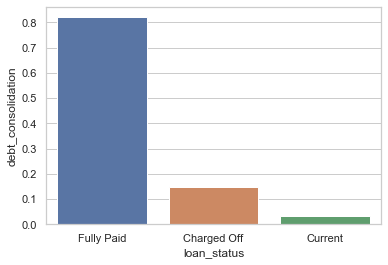

In [113]:
df_debt_consolidation = loan[loan['purpose'] == 'debt_consolidation']
temp = df_debt_consolidation['loan_status'].value_counts()/len(df_debt_consolidation)
temp = temp.reset_index()
temp.rename(columns={'index':'loan_status', 'loan_status':'debt_consolidation'}, inplace=True)
print(temp)
sns.set(style="whitegrid")
ax = sns.barplot(y="debt_consolidation", x="loan_status", data=temp)

   loan_status  credit_card
0   Fully Paid     0.874269
1  Charged Off     0.105653
2      Current     0.020078


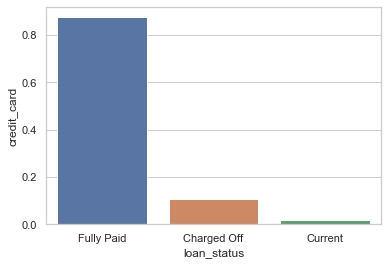

In [114]:
df_credit_card = loan[loan['purpose'] == 'credit_card']
temp = df_credit_card['loan_status'].value_counts()/len(df_credit_card)
temp = temp.reset_index()
temp.rename(columns={'index':'loan_status', 'loan_status':'credit_card'}, inplace=True)
print(temp)
sns.set(style="whitegrid")
ax = sns.barplot(y="credit_card", x="loan_status", data=temp)

         index  loan_status
0   Fully Paid     0.849462
1  Charged Off     0.116599
2      Current     0.033938


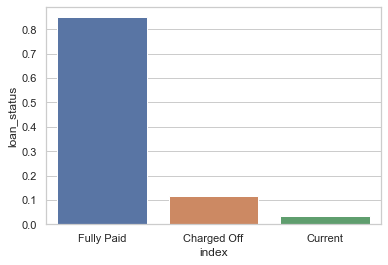

In [111]:
df_home_improvement = loan[loan['purpose'] == 'home_improvement']
temp=df_home_improvement['loan_status'].value_counts()/len(df_home_improvement)
temp = temp.reset_index()
print(temp)
sns.set(style="whitegrid")
ax = sns.barplot(y="loan_status", x="index", data=temp)

         index  loan_status
0   Fully Paid     0.881573
1  Charged Off     0.101509
2      Current     0.016918


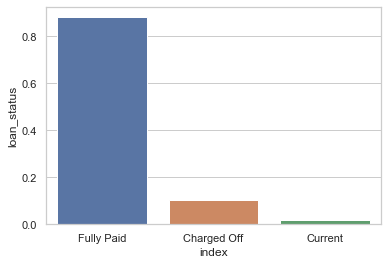

In [86]:
df_major_purchase = loan[loan['purpose'] == 'major_purchase']
temp= df_major_purchase['loan_status'].value_counts()/len(df_major_purchase)
temp = temp.reset_index()
print(temp)
sns.set(style="whitegrid")
ax = sns.barplot(y="loan_status", x="index", data=temp)

   loan_status  small_business
0   Fully Paid        0.699672
1  Charged Off        0.259847
2      Current        0.040481


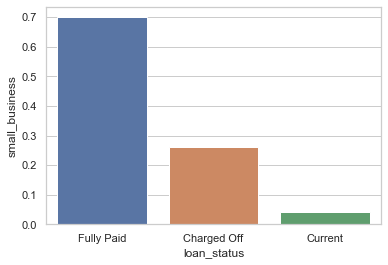

In [115]:
df_small_business = loan[loan['purpose'] == 'small_business']
temp=df_small_business['loan_status'].value_counts()/len(df_small_business)
temp = temp.reset_index()
temp.rename(columns={'index':'loan_status', 'loan_status':'small_business'}, inplace=True)
print(temp)
sns.set(style="whitegrid")
ax = sns.barplot(y="small_business", x="loan_status", data=temp)

RESULT : small_business loans have highest probablity to turn in NPAs.In this category, ~26% customers have defaulted

         index  loan_status
0   Fully Paid     0.864429
1  Charged Off     0.103292
2      Current     0.032279


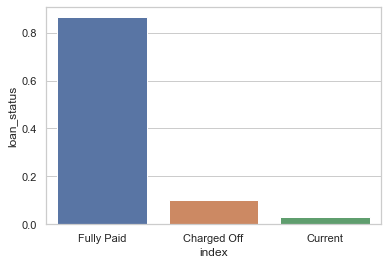

In [88]:
df_car = loan[loan['purpose'] == 'car']
temp=df_car['loan_status'].value_counts()/len(df_car)
temp = temp.reset_index()
print(temp)
sns.set(style="whitegrid")
ax = sns.barplot(y="loan_status", x="index", data=temp)

         index  loan_status
0   Fully Paid     0.876452
1  Charged Off     0.101373
2      Current     0.022175


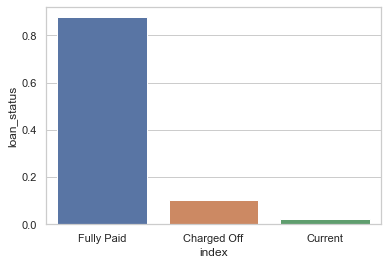

In [91]:
df_wedding = loan[loan['purpose'] == 'wedding']
temp=df_wedding['loan_status'].value_counts()/len(df_wedding)
temp = temp.reset_index()
print(temp)
sns.set(style="whitegrid")
ax = sns.barplot(y="loan_status", x="index", data=temp)

         index  loan_status
0   Fully Paid     0.829726
1  Charged Off     0.152958
2      Current     0.017316


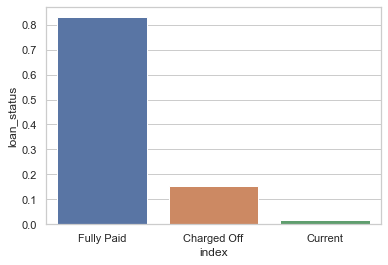

In [93]:
df_medical = loan[loan['purpose'] == 'medical']
temp=df_medical['loan_status'].value_counts()/len(df_medical)
temp = temp.reset_index()
print(temp)
sns.set(style="whitegrid")
ax = sns.barplot(y="loan_status", x="index", data=temp)

         index  loan_status
0   Fully Paid     0.830189
1  Charged Off     0.157804
2      Current     0.012007


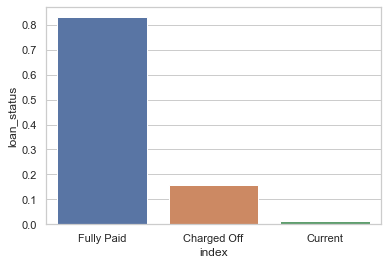

In [95]:
df_moving = loan[loan['purpose'] == 'moving']
temp=df_moving['loan_status'].value_counts()/len(df_moving)
temp = temp.reset_index()
print(temp)
sns.set(style="whitegrid")
ax = sns.barplot(y="loan_status", x="index", data=temp)

         index  loan_status
0   Fully Paid     0.845144
1  Charged Off     0.139108
2      Current     0.015748


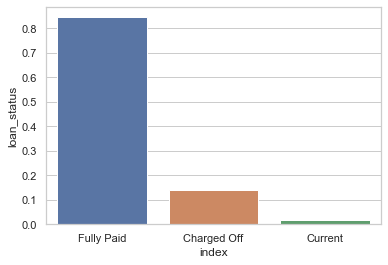

In [96]:
df_vacation = loan[loan['purpose'] == 'vacation']
temp=df_vacation['loan_status'].value_counts()/len(df_vacation)
temp = temp.reset_index()
print(temp)
sns.set(style="whitegrid")
ax = sns.barplot(y="loan_status", x="index", data=temp)

         index  loan_status
0   Fully Paid     0.808399
1  Charged Off     0.154856
2      Current     0.036745


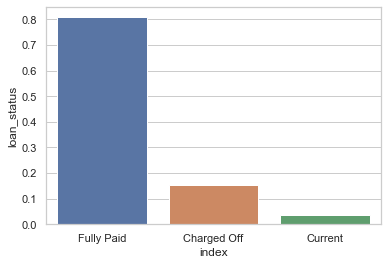

In [97]:
df_house = loan[loan['purpose'] == 'house']
temp=df_house['loan_status'].value_counts()/len(df_house)
temp = temp.reset_index()
print(temp)
sns.set(style="whitegrid")
ax = sns.barplot(y="loan_status", x="index", data=temp)

         index  loan_status
0   Fully Paid     0.827692
1  Charged Off     0.172308


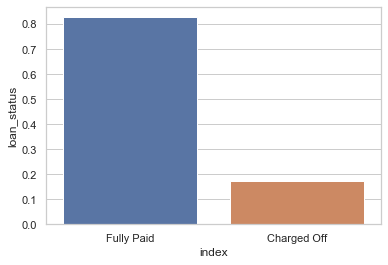

In [98]:
df_educational = loan[loan['purpose'] == 'educational']
temp=df_educational['loan_status'].value_counts()/len(df_educational)
temp = temp.reset_index()
print(temp)
sns.set(style="whitegrid")
ax = sns.barplot(y="loan_status", x="index", data=temp)

         index  loan_status
0   Fully Paid     0.805825
1  Charged Off     0.184466
2      Current     0.009709


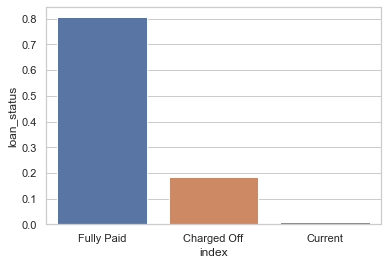

In [99]:
df_renewable_energy = loan[loan['purpose'] == 'renewable_energy']
temp=df_renewable_energy['loan_status'].value_counts()/len(df_renewable_energy)
temp = temp.reset_index()
print(temp)
sns.set(style="whitegrid")
ax = sns.barplot(y="loan_status", x="index", data=temp)

         index  loan_status
0   Fully Paid     0.809416
1  Charged Off     0.158527
2      Current     0.032056


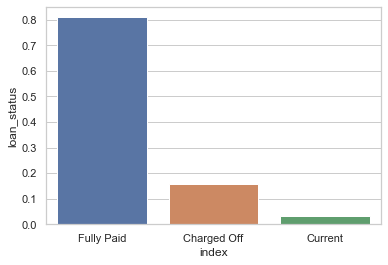

In [100]:
df_other = loan[loan['purpose'] == 'other']
temp=df_other['loan_status'].value_counts()/len(df_other)
temp = temp.reset_index()
print(temp)
sns.set(style="whitegrid")
ax = sns.barplot(y="loan_status", x="index", data=temp)

   loan_status       mean  revol_util_median
0  Charged Off  55.572110              58.40
1      Current  53.204482              54.95
2   Fully Paid  47.531801              47.60


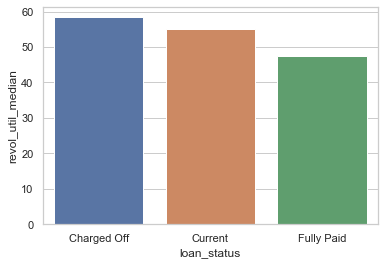

In [116]:
#################### IMPACT OF revol_util on loan_status ######################
temp = loan.groupby('loan_status')['revol_util'].agg(['mean','median'])
temp = temp.reset_index()
temp.rename(columns={'median':'revol_util_median'}, inplace=True)
print(temp)
sns.set(style="whitegrid")
ax = sns.barplot(y="revol_util_median", x="loan_status", data=temp)


RESULT : Customers who have  high utilization of  the revolving credit are more likely to default

In [107]:
tab_loan_status_issue_d_month = pd.crosstab(loan['loan_status'],loan['issue_d_month']).apply(lambda r: r/r.sum(),axis=1)*100
tab_loan_status_issue_d_month.reset_index(inplace=True)
print(tab_loan_status_issue_d_month)


issue_d_month  loan_status        07        08         09         10  \
0              Charged Off  0.799716  4.389550  10.556247  26.390617   
1                  Current  0.000000  0.000000   0.000000   0.000000   
2               Fully Paid  0.625190  3.990895  12.509863  30.491654   

issue_d_month          11  
0               57.863871  
1              100.000000  
2               52.382398  


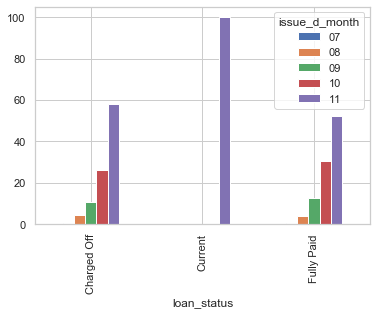

In [108]:
tab_loan_status_issue_d_month.plot(x="loan_status", y=['07','08','09','10','11'], kind="bar")

RESULT : laon approved in third quarter has the highest default rate